![banner](https://github.com/ImperialCollegeLondon/physics-summer-school/blob/main/notebooks/images/ImperialBanner_trans.png?raw=1)

# Simple Harmonic Oscillators (part 1.)

Consider a mass attached to a spring lying on a frictionless surface as shown in the figure.

![basic shm](https://github.com/ImperialCollegeLondon/physics-summer-school/blob/main/notebooks/images/SHM.svg?raw=1)</br>




The resotoring force on the mass is directly proportional to the extension of the spring so :

$$
m\frac{d^2x}{dt^2}=-kx
$$

Where $k$ is the spring constant for that spring.

This can be rewritten as

$$
\frac{d^2x}{dt^2} = - \omega^2 x
$$

where $\omega= \sqrt{k/m}$


**Write this second order differentional equation as a series of first order differential equations in the box below.**

$$\frac{dx}{dt} = v$$
$$\frac{dv}{dt} = -\omega^2 x$$


**Now write a simulation of a similar system with a spring constant $18Nm^{-1}$ and a mass of 0.5 Kg. Plot both the position and the velocity of the mass if intitally you extend the spring by 10cm. Run your simulation for 10s. You should think about what is happening to the energy in this system**

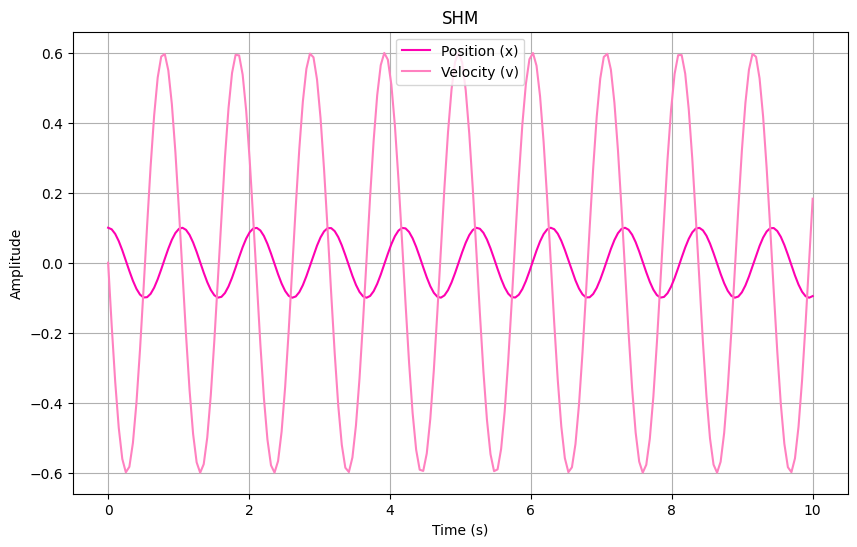

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.optimize as optimize

k = 18
m = 0.5
omega_sq = k / m

def dif_function(y, t):
    x, v = y
    dxdt = v
    dvdt = -omega_sq * x
    return [dxdt, dvdt]

initial_conditions = [0.1, 0]


t = np.linspace(0, 10, 200)

solution = integrate.odeint(dif_function, initial_conditions, t)


position = solution[:, 0]
velocity = solution[:, 1]


plt.figure(figsize=(10, 6))
plt.plot(t, position, label='Position (x)', color='xkcd:bright pink')
plt.plot(t, velocity, label='Velocity (v)', color='xkcd:pink')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('SHM')
plt.legend()
plt.grid(True)
plt.show()

## Damped Oscillators
Now you replace the frictionless surface with different surfaces with different amounts of friction. However in each case the friction is proportional to the velocity so the equation of motion becomes:

$$
m\frac{d^2x}{dt^2} +b\frac{dx}{dt} +k x=0
$$

where b is a constant for the particular surface.
This is often written as:

$$
\frac{d^2x}{dt^2} +\gamma\frac{dx}{dt}+  \omega^2 x =0
$$

**Modify your simulations to include this damping. Investigate how the motion changes with different values of $b$. Specifically, try values of $b$ that are less than 6, $b=6$ and values for $b$ that are much greater than 6. You should try to describe what you see and decide whether or not the motion is oscillatory or not. Keep the plots as they may be useful in your presentation. You should think about what is happening to the energy in this system**


$$\frac{dx}{dt} = v$$
$$\frac{dv}{dt} = -\omega^2 x$$


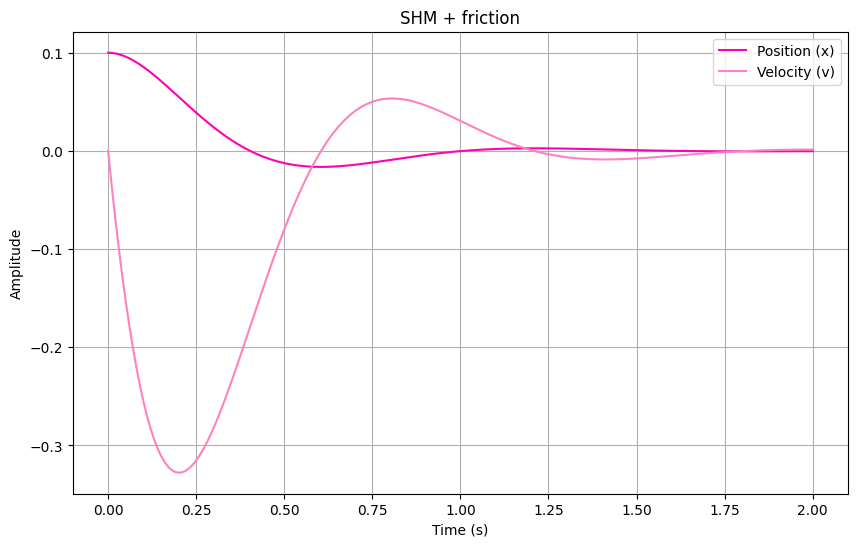

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.optimize as optimize

k = 18
m = 0.5
omega_sq = k / m
b = 3


def dif_function(y, t):
    x, v = y
    dxdt = v
    dvdt = -omega_sq * x - (b / m) * v
    return [dxdt, dvdt]

initial_conditions = [0.1, 0]


t = np.linspace(0, 2, 200)

solution = integrate.odeint(dif_function, initial_conditions, t)


position = solution[:, 0]
velocity = solution[:, 1]


plt.figure(figsize=(10, 6))
plt.plot(t, position, label='Position (x)', color='xkcd:bright pink')
plt.plot(t, velocity, label='Velocity (v)', color='xkcd:pink')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('SHM + friction')
plt.legend()
plt.grid(True)
plt.show()

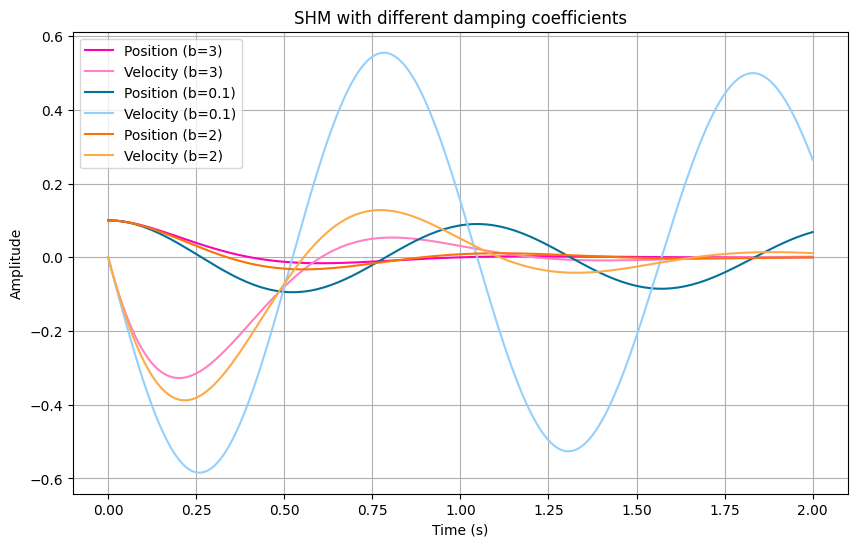

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.optimize as optimize

k = 18
m = 0.5
omega_sq = k / m
b = 3
c = 0.1
d = 2


def dif_function1(y, t):
    x, v = y
    dxdt = v
    dvdt = -omega_sq * x - (b / m) * v
    return [dxdt, dvdt]

def dif_function2(y, t):
  x, v = y
  dxdt = v
  dvdt = -omega_sq * x - (c / m) * v
  return [dxdt, dvdt]

def dif_function3(y, t):
  x, v = y
  dxdt = v
  dvdt = -omega_sq * x - (d / m) * v
  return [dxdt, dvdt]

initial_conditions = [0.1, 0]


t = np.linspace(0, 2, 200)

solution1 = integrate.odeint(dif_function1, initial_conditions, t)
solution2 = integrate.odeint(dif_function2, initial_conditions, t)
solution3 = integrate.odeint(dif_function3, initial_conditions, t)


position1 = solution1[:, 0]
velocity1 = solution1[:, 1]

position2 = solution2[:, 0]
velocity2 = solution2[:, 1]

position3 = solution3[:, 0]
velocity3 = solution3[:, 1]


plt.figure(figsize=(10, 6))
plt.plot(t, position1, label=f'Position (b={b})', color='xkcd:bright pink')
plt.plot(t, velocity1, label=f'Velocity (b={b})', color='xkcd:pink')
plt.plot(t, position2, label=f'Position (b={c})', color='xkcd:ocean blue')
plt.plot(t, velocity2, label=f'Velocity (b={c})', color='xkcd:light blue')
plt.plot(t, position3, label=f'Position (b={d})', color='xkcd:orange')
plt.plot(t, velocity3, label=f'Velocity (b={d})', color='xkcd:light orange')

plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('SHM with different damping coefficients')
plt.legend()
plt.grid(True)
plt.show()

To rewrite the second-order differential equation for a damped oscillator:

$$
m\frac{d^2x}{dt^2} +b\frac{dx}{dt} +k x=0
$$

as a system of two first-order differential equations, we introduce a new variable for the velocity:

Let $v = \frac{dx}{dt}$.

Then, the second derivative of $x$ with respect to $t$ is the first derivative of $v$ with respect to $t$:

$$
\frac{d^2x}{dt^2} = \frac{dv}{dt}
$$

Now, substitute these into the original equation:

$$
m\frac{dv}{dt} + bv + kx = 0
$$

Rearranging this equation to solve for $\frac{dv}{dt}$:

$$
\frac{dv}{dt} = -\frac{b}{m}v - \frac{k}{m}x
$$

So, the system of two first-order differential equations is:

1.  $$
    \frac{dx}{dt} = v
    $$
2.  $$
    \frac{dv}{dt} = -\frac{b}{m}v - \frac{k}{m}x
    $$

This system can also be written using $\gamma = b/m$ and $\omega^2 = k/m$:

1.  $$
    \frac{dx}{dt} = v
    $$
2.  $$
    \frac{dv}{dt} = -\gamma v - \omega^2 x
    $$